# What are the most demanded skills for the top 3 most popular data roles?

## Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

# Import Libraries and Data

In [12]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset
df = pd.read_csv(r'C:\Users\ARJUN\Python_projects\Python_Course\data_jobs.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter Data for India

In [13]:
df_IND = df[df['job_country'] == 'India'].copy()

# Explode Skills

Converts the 'job_skills' column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the 'job_title' and 'job_skills' columns, allowing us to analyze the distribution of skills across different data job titles.

In [14]:
df_skills = df_IND.explode('job_skills')
df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
16,Data Engineer,powershell
16,Data Engineer,python
16,Data Engineer,sql
16,Data Engineer,mysql
16,Data Engineer,sql server
...,...,...
785716,Software Engineer,c#
785716,Software Engineer,sql
785718,Business Analyst,NaN
785740,Software Engineer,aws


# Count Skills per Job Title

Groups DataFrame by **'job_skills'** and **'job_title_short'**, counting the occurrences of each skill within each job title. Then resets the index of the Series to turn it back into a DataFrame and renames the series holding the count to **'count'**. The final DataFrame, **'df_skills_count'**, shows the frequency of each skill with each job title.

In [15]:
# Group by 'job_title_short' and 'job_skills' and count the number of occurrences
df_skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()

# Name the count column as 'skill_count'
df_skills_count = df_skills_count.reset_index(name = 'skill_count')

# Sort the values by 'skill_count' in descending order
df_skills_count.sort_values(by = 'skill_count', ascending = False, inplace = True)

df_skills_count

,job_title_short,job_skills,skill_count
637,Data Engineer,sql,12993
603,Data Engineer,python,11568
807,Data Scientist,python,9248
632,Data Engineer,spark,7157
480,Data Engineer,aws,6993
...,...,...,...
1472,Senior Data Scientist,svn,1
998,Machine Learning Engineer,svn,1
138,Business Analyst,twilio,1
835,Data Scientist,solidity,1


# Create List of Top 3 Roles

## Focus: Data Analysts, Data Engineers, and Data Scientists

In [16]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[0:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

# Plot Skill Counts

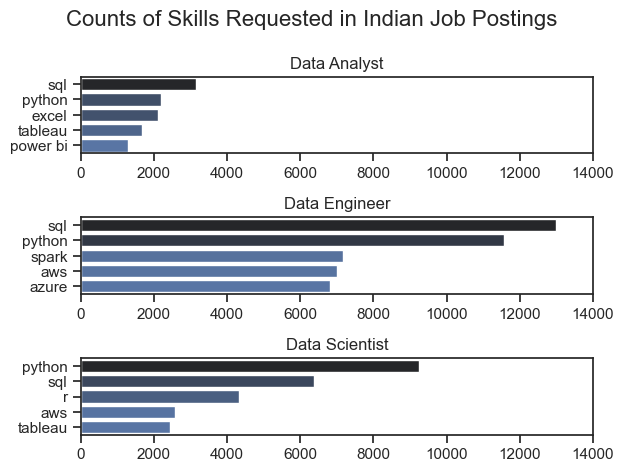

In [17]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style = 'ticks')

for index, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    sns.barplot(data = df_plot, x = 'skill_count', y = 'job_skills', hue = 'skill_count' , ax = ax[index], palette = 'dark:b_r')
    ax[index].set_title(job_title)
    ax[index].get_legend().remove()
    ax[index].set_xlabel('')
    ax[index].set_ylabel('')
    ax[index].set_xlim(0, 14000)
    
fig.suptitle('Counts of Skills Requested in Indian Job Postings', fontsize = 16)    
fig.tight_layout(h_pad = 1) # increases the horizontal spacing between the two subplots
plt.show()

# Convert Counts to Percentages

## Focus: Counts don't show what portions of jobs are requesting these skills

So we'll convert the counts into percentages which helps us understand how each job title represents relatively to the entire dataset.

Before we can calculate the percentages we need the total counts for the jobs posted by job title. Calculate the frequency of each job title using the value_counts() method on the **'job_title_short'** column. Then reset the index to transform the Series into a DataFrame and rename the columns to **'job_title_short'** and **'jobs_total'**. The DataFrame **'df_job_title_count'** now holds a list of job titles alongside their total occurrences.

In [18]:
# Use original df_IND to get the count of job titles
df_job_title_count = df_IND['job_title_short'].value_counts().reset_index()
df_job_title_count.columns = ['job_title_short', 'jobs_total']
df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


Then we calculate the percentages. First merge **'df_skills_count'** and **'df_job_title_count'**, based on the **'job_title_short'** column, ensuring each skill count is associated with the total number of job postings for that title. Then calculate the percentage of each skill within its job title by dividing the skill count by the total job postings and multiplying by 100, adding this new data as a 'percentage' column.

% of skill in a job posting = (skill count in job postings) / (total count of job postings) * 100

In [20]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how = 'left', on = 'job_title_short')
df_skills_perc['skill_percent'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100
df_skills_perc

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Engineer,sql,12993,19062,68.161788
1,Data Engineer,python,11568,19062,60.686182
2,Data Scientist,python,9248,13279,69.643798
3,Data Engineer,spark,7157,19062,37.545903
4,Data Engineer,aws,6993,19062,36.685552
...,...,...,...,...,...
1684,Senior Data Scientist,svn,1,2486,0.040225
1685,Machine Learning Engineer,svn,1,671,0.149031
1686,Business Analyst,twilio,1,1887,0.052994
1687,Data Scientist,solidity,1,13279,0.007531


# Plot Percentage Count

Filters and sorts the DataFrame to get the top 5 skills percentages for these top 3 roles. After sorting the skills by descending percentage, reverse the order of these top 5 entries to use in a horizontal bar plot, which by default starts plotting from the bottom.

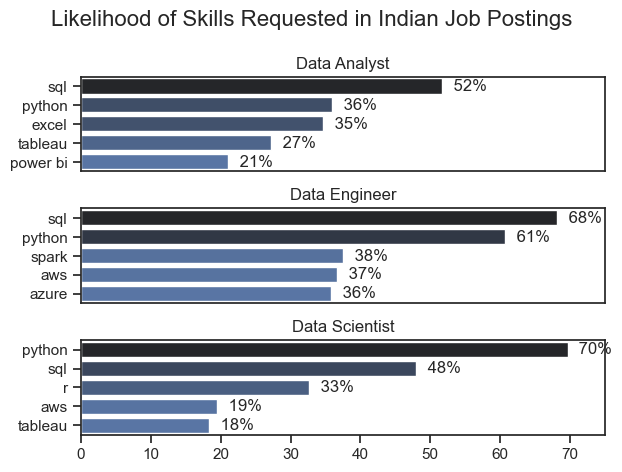

In [45]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style = 'ticks')

for index, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head()
    sns.barplot(data = df_plot, x = 'skill_percent', y = 'job_skills', ax = ax[index] , hue = 'skill_percent', palette = 'dark:b_r')
    ax[index].set_title(job_title)
    ax[index].set_ylabel('')
    ax[index].set_xlabel('')
    ax[index].get_legend().remove()
    ax[index].set_xlim(0, 75)
    
    for i, value in enumerate(df_plot['skill_percent']):
        ax[index].text(value + 1, i, f'{value: .0f}%', va = 'center')
        
    if index != len(job_titles) - 1:
        ax[index].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in Indian Job Postings', fontsize = 16)        
fig.tight_layout(h_pad = 1)
plt.show()

# Insights
1. SQL is a core skill for all data roles.
2. Python is a versatile tool for data analysis, engineering, and science.
3. Role-specific skills include Excel, Tableau, Power BI for analysts; Spark, AWS, Azure for engineers; and machine learning libraries for scientists.